In [1]:
import pandas as pd
import numpy as np
import re
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

/home/mr1142/miniconda3/envs/jupyter_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# TRAIN RESULTS

Estos son los resultados del entrenamiento (history). Está recogido el máximo valor de cada una de las métricas y de la loss (no sabemos que epoch es)

In [4]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max.csv'
df_train = pd.read_csv(path)

In [5]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_train['name'])

In [6]:
print(len(modelos))
print(len(modelos_evaluados))

90
90


In [7]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

[]

In [8]:
evaluados_de_mas = list(set(modelos_evaluados)-set(modelos))
ix = [i for i in df_train.index if df_train.name[i] in evaluados_de_mas]
evaluados_de_mas

[]

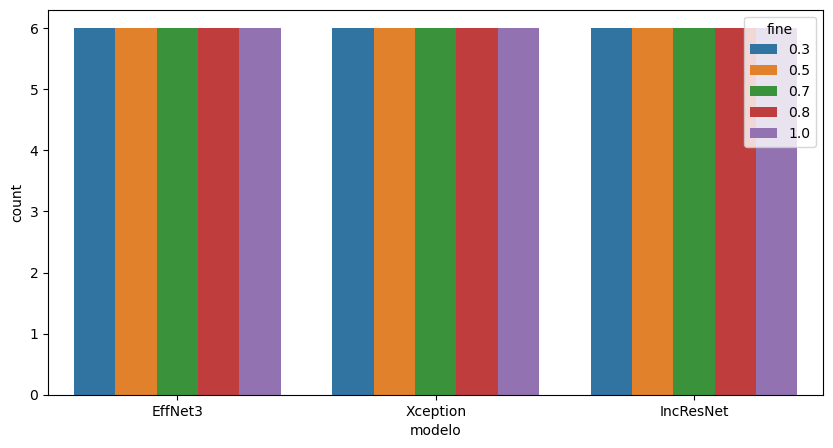

In [9]:
plt.subplots(figsize=(10,5))
p = sns.countplot(x="modelo",
                hue="fine",
                data=df_train)

## Ploteo

In [10]:
y = 'val_auc'
data = df_train
lim = np.percentile(data[y], 20)

[(0.8533325433731079, 1.0)]

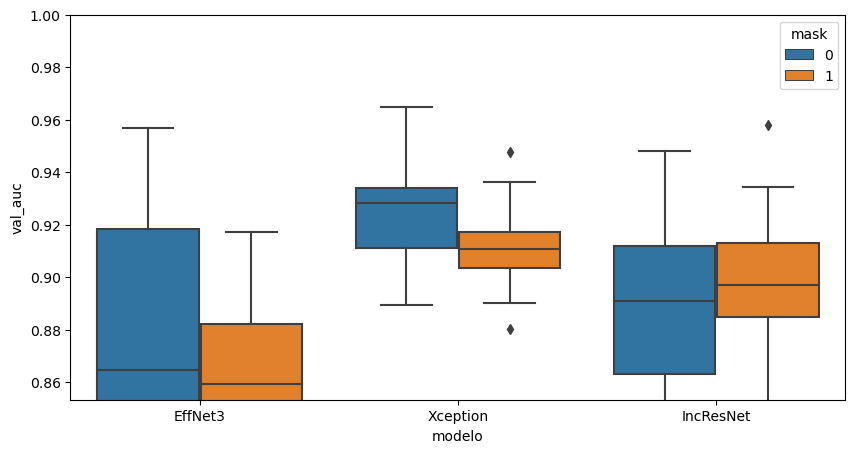

In [11]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731079, 1.0)]

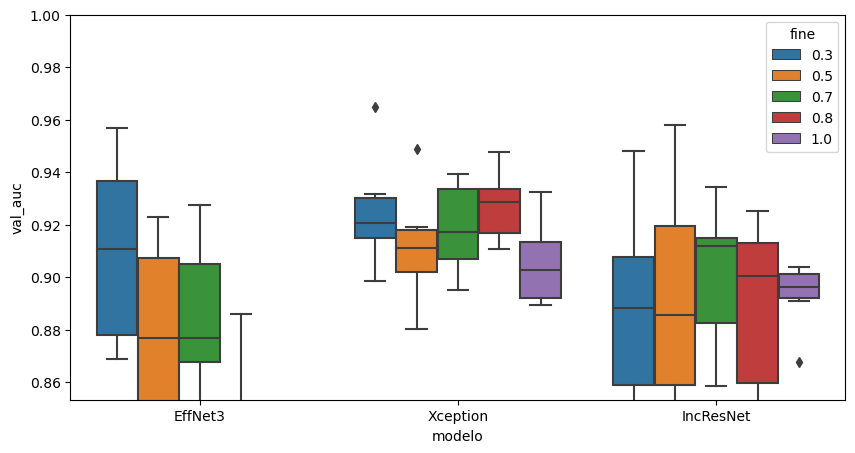

In [12]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731079, 1.0)]

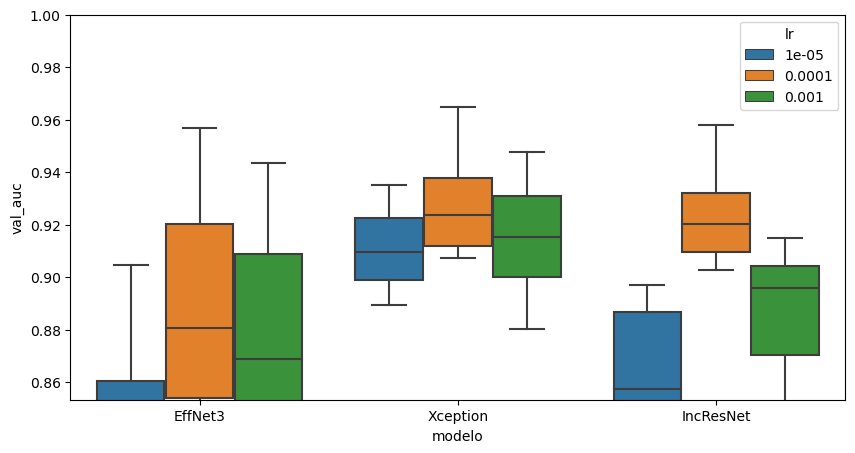

In [13]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731079, 1.0)]

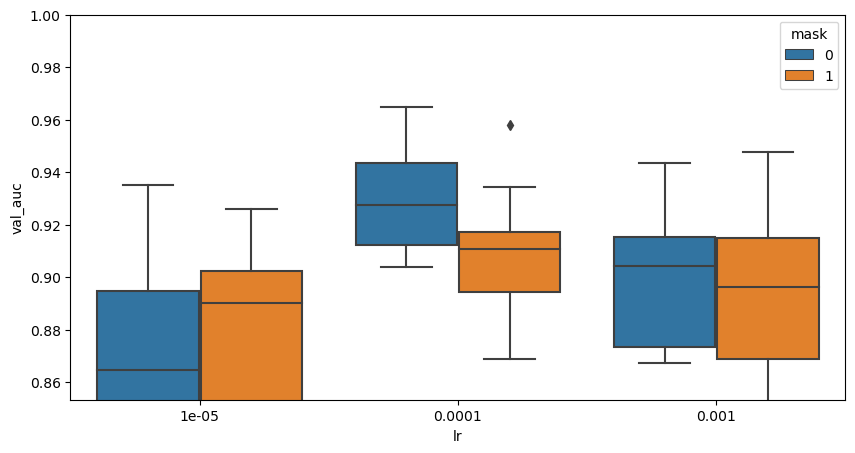

In [14]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731079, 1.0)]

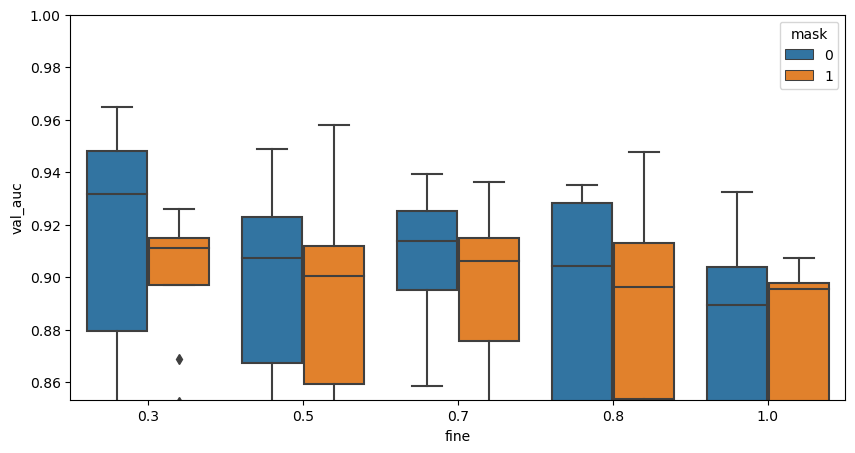

In [15]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8533325433731079, 1.0)]

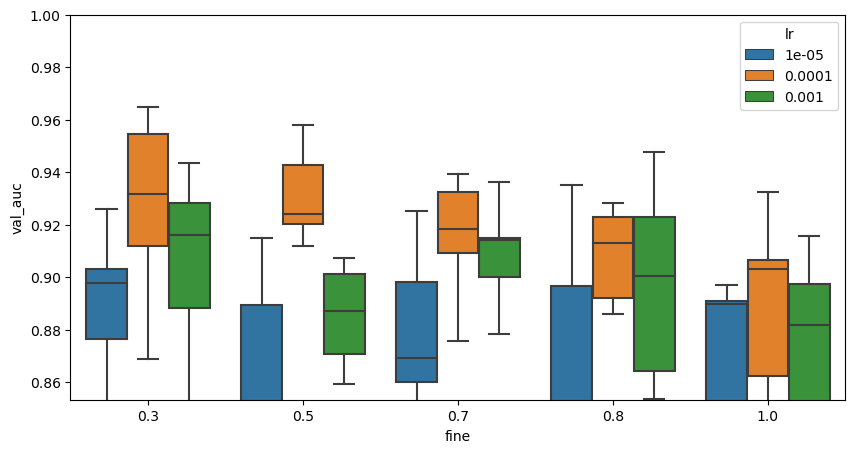

In [16]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST EVALUATION RESULTS

Estos son los resultados de aplicar model.evaluate() sobre el subset de X_train que he seleccionado para test.

In [17]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation.csv'
df_test = pd.read_csv(path)

### Modelos sin evaluar

In [18]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df_test['nombre'])

In [19]:
modelos_evaluados_resto = [modelo for modelo in modelos_evaluados if 
                           bool(re.search('resto', modelo))]
modelos_evaluados_resto = [re.split('_resto', modelo)[0] for 
                           modelo in modelos_evaluados_resto]

In [20]:
print(len(modelos))
print(len(set(modelos_evaluados)-set(modelos_evaluados_resto)))
print(len(modelos_evaluados_resto))
print(len(modelos_evaluados))

90
90
86
176


In [21]:
evaluados_de_mas = list(set(modelos_evaluados) - set(modelos))
evaluados_de_mas = [modelo for modelo in evaluados_de_mas if not
                  bool(re.search('resto', modelo))]
ix = [i for i in df_test.index if df_test.nombre[i] in evaluados_de_mas]
evaluados_de_mas

[]

In [22]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

[]

In [23]:
# list(set(modelos_evaluados)-set(modelos))

In [24]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

[]

In [25]:
modelos_a_evaluar_resto = list(set(modelos)-set(modelos_evaluados_resto))
len(modelos_a_evaluar_resto)

13

In [26]:
df_test = df_test.reset_index(drop = True)

## RESTO

In [27]:
index = [i for i in df_test.index if bool(re.search('resto', df_test['nombre'][i]))]
df_resto = df_test.iloc[index]

In [28]:
df_resto = df_resto.reset_index(drop = True)

In [29]:
df_resto['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_resto['nombre']))

In [30]:
df_resto['modelo'] = list(map(lambda x: re.split('_', x)[-6], df_resto['nombre']))
df_resto['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_resto['nombre']))
df_resto['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_resto['nombre']))
df_resto['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-5])[1], df_resto['nombre']))

In [31]:
df_resto.sort_values('auc').tail()

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
1,prueba_Xception_fine-08_batch-8_lr--05_auc-93_...,0.492753,0.861533,0.799576,0.936951,False,Xception,,8,08
13,prueba_Xception_fine-07_batch-8_lr-0001_auc-93...,0.460160,0.862593,0.810351,0.939811,False,Xception,0001,8,07
7,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94_r...,0.449572,0.875653,0.822589,0.944469,False,EffNet3,001,8,03
32,prueba_Xception_fine-03_batch-8_lr-0001_auc-96...,0.467708,0.878570,0.819950,0.947685,False,Xception,0001,8,03
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95_...,0.430632,0.872832,0.814099,0.950276,False,EffNet3,0001,8,03


### Ploteo

In [32]:
# df_resto = df_resto[df_resto.lr == '0001']

In [33]:
y = 'binary_accuracy'
data = df_resto
lim = np.percentile(data[y], 20)

[(0.7602855563163757, 1.0)]

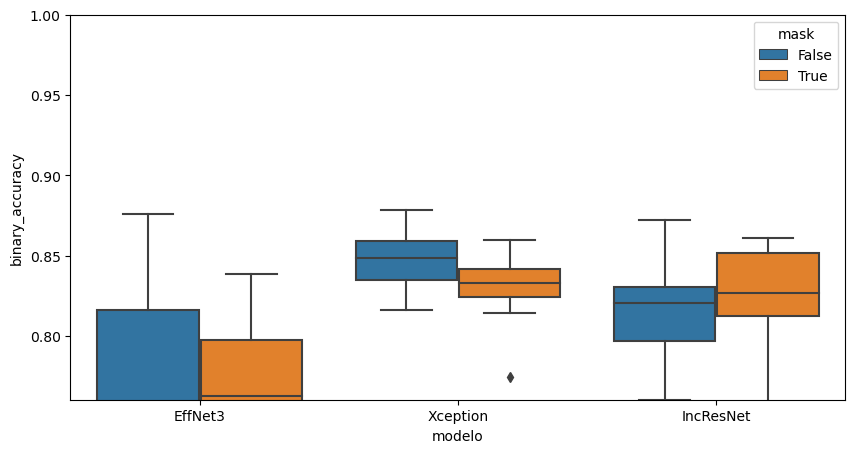

In [34]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7602855563163757, 1.0)]

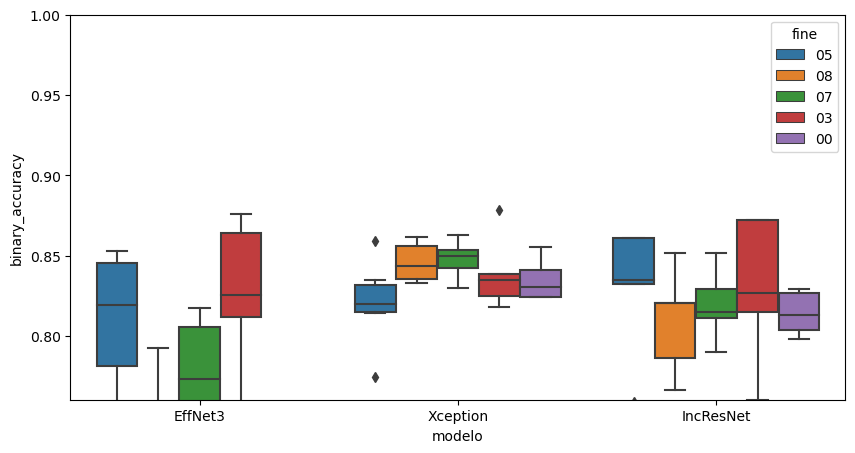

In [35]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.7602855563163757, 1.0)]

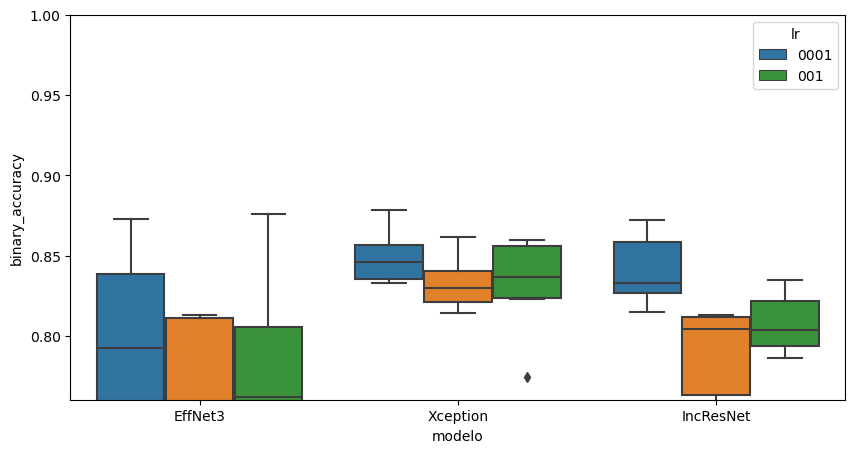

In [36]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.7602855563163757, 1.0)]

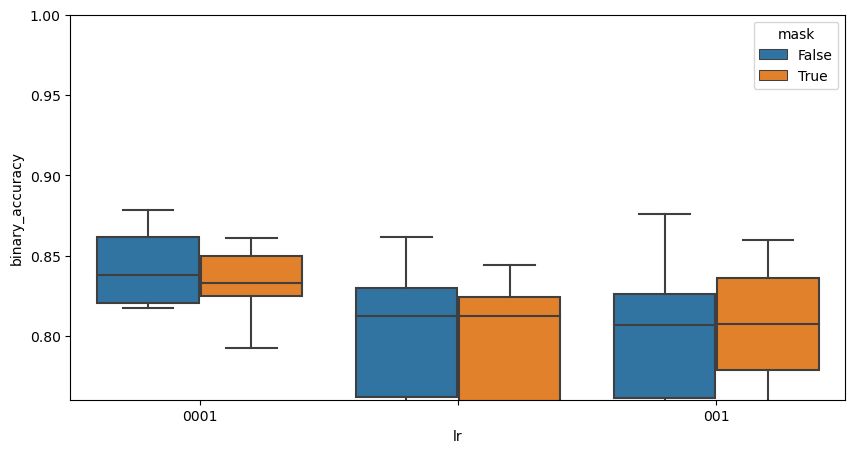

In [37]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7602855563163757, 1.0)]

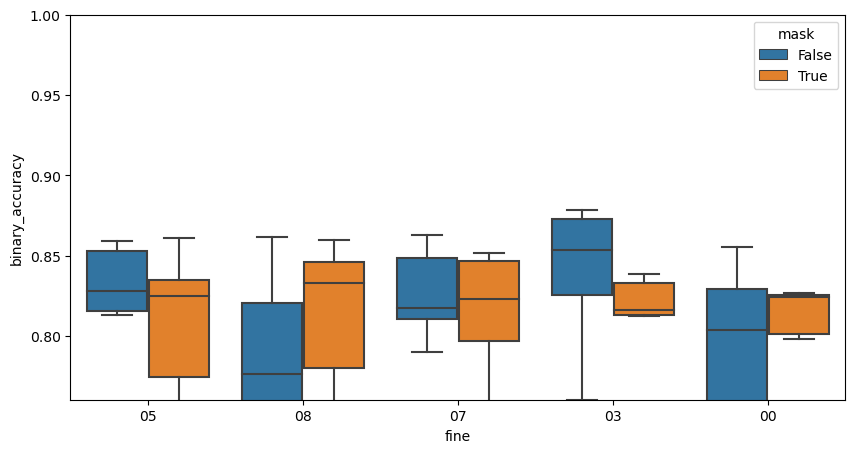

In [38]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.7602855563163757, 1.0)]

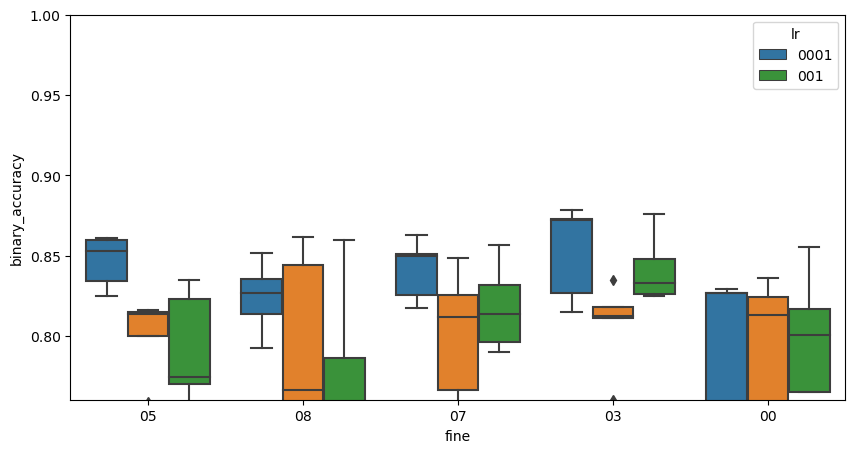

In [39]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

## SUBSET

In [40]:
index = list(set(df_test.index) - set(index))
df_test = df_test.iloc[index]

In [41]:
df_test = df_test.reset_index(drop = True)

In [42]:
df_test['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_test['nombre']))

In [43]:
df_test['modelo'] = list(map(lambda x: re.split('_', x)[-5], df_test['nombre']))
df_test['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df_test['nombre']))
df_test['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_test['nombre']))
df_test['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_test['nombre']))

In [44]:
df_test.sort_values('auc').tail()

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
35,prueba_Xception_fine-03_batch-8_lr-0001_auc-96,0.549459,0.848849,0.775202,0.928931,False,Xception,0001,8,03
10,prueba_Xception_fine-07_batch-8_lr-0001_auc-93,0.485459,0.848849,0.786164,0.930917,False,Xception,0001,8,07
4,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,0.488490,0.863196,0.803296,0.931229,False,EffNet3,001,8,03
57,prueba_Xception_fine-08_batch-8_lr-001_auc-92,0.525883,0.861862,0.796954,0.931729,False,Xception,001,8,08
3,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.436792,0.871204,0.813075,0.945697,False,EffNet3,0001,8,03


### Ploteo

In [45]:
y = 'auc'
data = df_test
lim = np.percentile(data[y], 20)

[(0.8383310437202454, 1.0)]

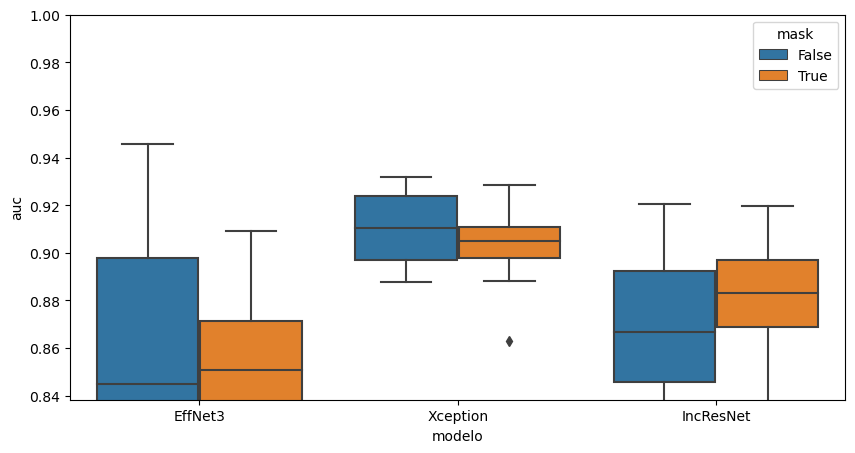

In [46]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8383310437202454, 1.0)]

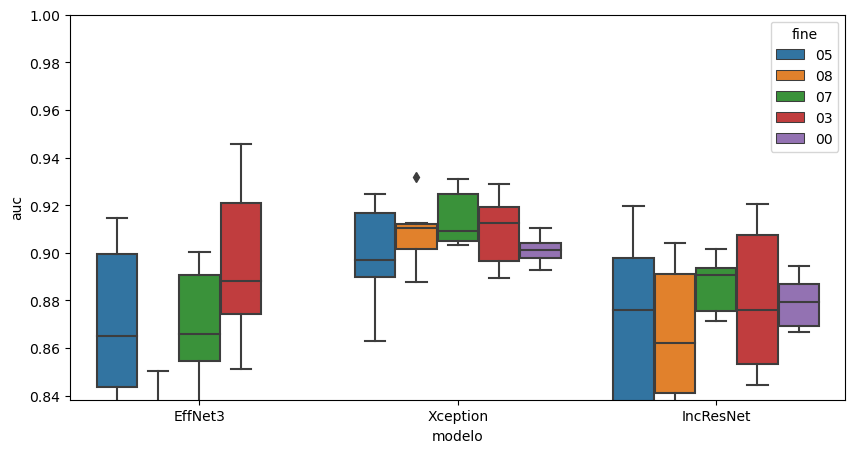

In [47]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8383310437202454, 1.0)]

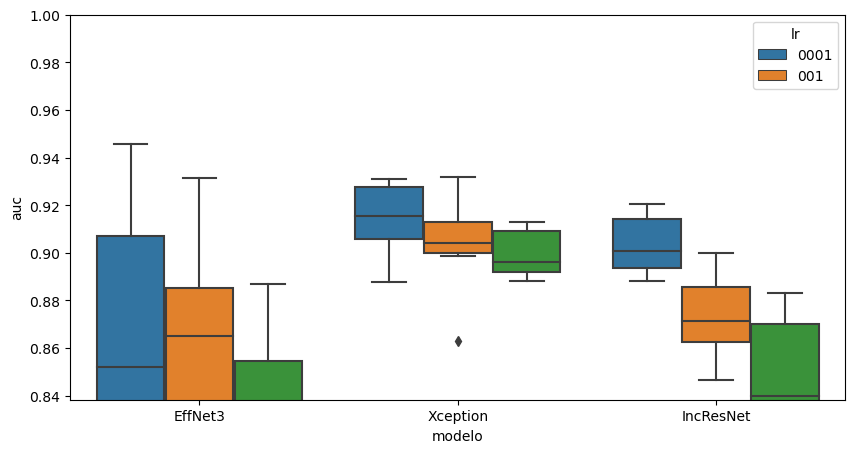

In [48]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8383310437202454, 1.0)]

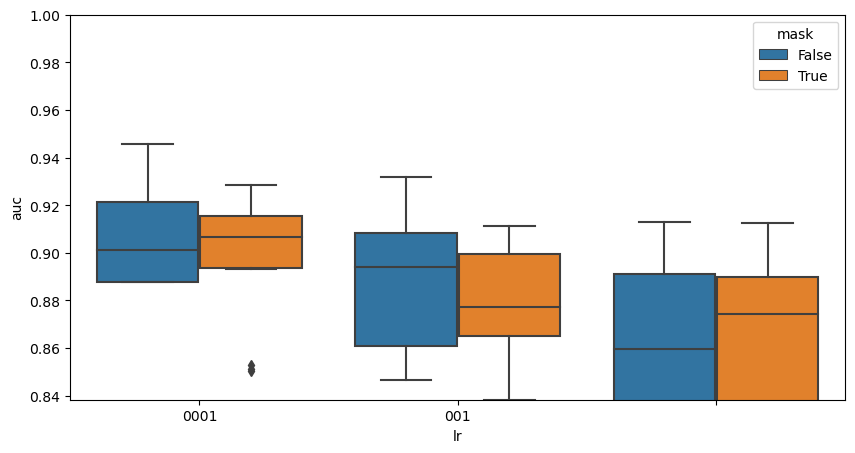

In [49]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8383310437202454, 1.0)]

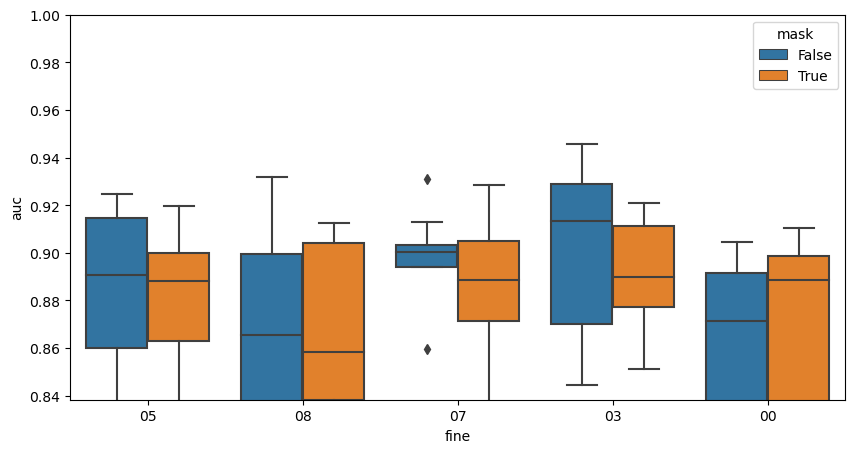

In [50]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8383310437202454, 1.0)]

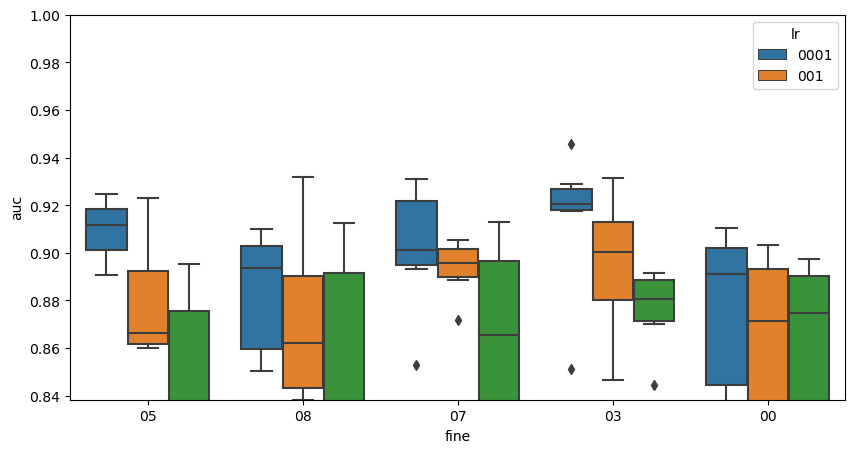

In [51]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

# SUBSET TEST PREDICTION METRICS

Estos son los resultados de aplicar model.predict() sobre el subset de X_train que he seleccionado para test. Sobre las predicciones se calculan unas métricas personalizadas

In [52]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics.csv'
df = pd.read_csv(path)

### Modelos sin evaluar

In [53]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if not bool(re.search('completo', modelo))]
modelos_evaluados = list(df['name'])

In [54]:
len(df)

147

In [55]:
modelos_evaluados_resto = [modelo for modelo in modelos_evaluados if 
                           bool(re.search('resto', modelo))]
modelos_evaluados_resto = [re.split('_resto', modelo)[0] for 
                           modelo in modelos_evaluados_resto]

In [56]:
print(len(modelos))
print(len(set(modelos_evaluados)-set(modelos_evaluados_resto)))
print(len(modelos_evaluados_resto))
print(len(modelos_evaluados))

90
90
58
147


In [57]:
evaluados_de_mas = list(set(modelos_evaluados) - set(modelos))
evaluados_de_mas = [modelo for modelo in evaluados_de_mas if not
                  bool(re.search('resto', modelo))]
ix = [i for i in df.index if df.name[i] in evaluados_de_mas]
evaluados_de_mas

[]

In [58]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

['prueba_mask_Xception_fine-05_batch-8_lr-001_auc-88']

In [59]:
# list(set(modelos_evaluados)-set(modelos))

In [60]:
modelos_train = set(df_train['name'])
list(set(modelos_train)-set(modelos_evaluados))

['prueba_mask_Xception_fine-05_batch-8_lr-001_auc-88']

In [61]:
modelos_a_evaluar_resto = list(set(modelos)-set(modelos_evaluados_resto))
len(modelos_a_evaluar_resto)

32

In [494]:
df = df.reset_index(drop = True)

## RESTO

In [439]:
index = [i for i in df.index if bool(re.search('resto', df['name'][i]))]
df_resto = df.iloc[index]

In [440]:
df_resto = df_resto.reset_index(drop = True)

In [441]:
df_resto['auc_mean'] = (df_resto['auc_0']+df_resto['auc_1']+df_resto['auc_2'])/3
df_resto['accuracy_mean'] = (df_resto['accuracy_score_0']+
                             df_resto['accuracy_score_1']+
                             df_resto['accuracy_score_2'])/3

In [442]:
df_resto.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,accuracy_mean
40,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94_r...,0.974926,0.391551,0.364874,0.346703,0.897896,0.325556,0.318853,0.457360,0.929047,...,0.740555,0.879674,0.705830,0.705830,0.881764,0.884650,0.879584,0.879584,0.933956,0.874935
33,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.964606,0.626558,0.622067,0.666807,0.888898,0.069674,0.035041,0.164992,0.950058,...,0.761242,0.887700,0.729359,0.729359,0.812053,0.893080,0.788754,0.788754,0.934521,0.810674
6,prueba_Xception_fine-03_batch-8_lr-0001_auc-96...,0.979880,0.414729,0.364114,0.530843,0.902144,0.258009,0.153467,0.543801,0.929051,...,0.785556,0.880504,0.757970,0.757970,0.883830,0.882118,0.886908,0.886908,0.937025,0.878278
15,prueba_Xception_fine-07_batch-8_lr-0001_auc-93...,0.982743,0.298095,0.273896,0.338365,0.904439,0.253418,0.185119,0.366078,0.924378,...,0.706673,0.880027,0.668235,0.668235,0.831298,0.871358,0.815175,0.815175,0.937187,0.861006
25,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95_...,0.986002,0.373820,0.373820,0.427705,0.916031,0.160859,0.132412,0.306705,0.934488,...,0.725724,0.880094,0.689197,0.689197,0.862553,0.888442,0.851828,0.851828,0.945507,0.872060


In [443]:
df_resto['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_resto['name']))

In [444]:
df_resto['modelo'] = list(map(lambda x: re.split('_', x)[-6], df_resto['name']))
df_resto['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_resto['name']))
df_resto['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_resto['name']))
df_resto['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-5])[1], df_resto['name']))

In [445]:
df_resto.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'auc_mean', 'accuracy_mean', 'mask', 'modelo',
       'lr', 'batch', 'fine'],
      dtype='object')

### Ploteo

In [109]:
y = 'auc_mean'
data = df_resto
lim = np.percentile(data[y], 20)

[(0.8694992966902388, 1.0)]

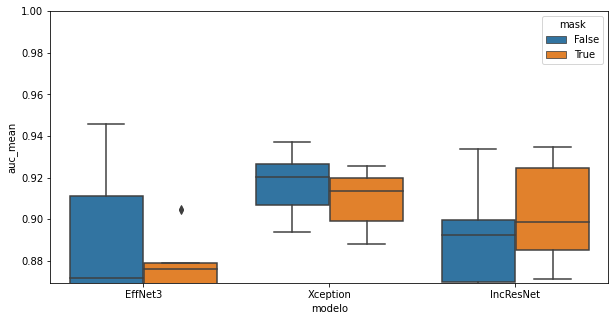

In [110]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8694992966902388, 1.0)]

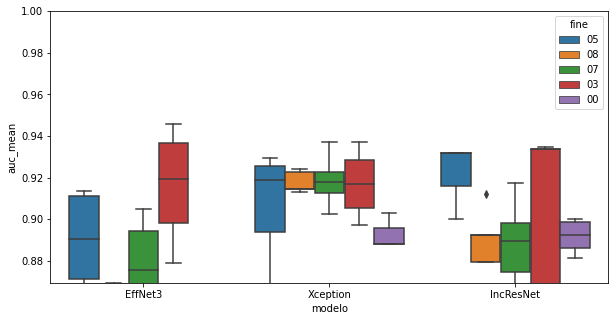

In [111]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.8694992966902388, 1.0)]

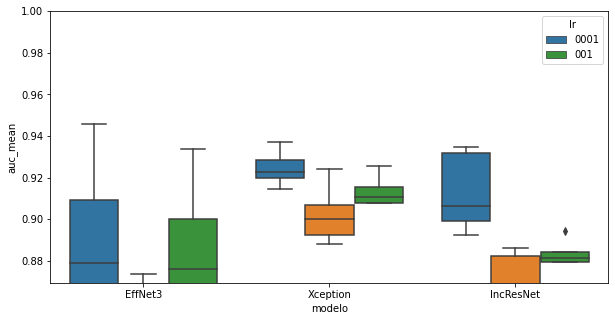

In [112]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.8694992966902388, 1.0)]

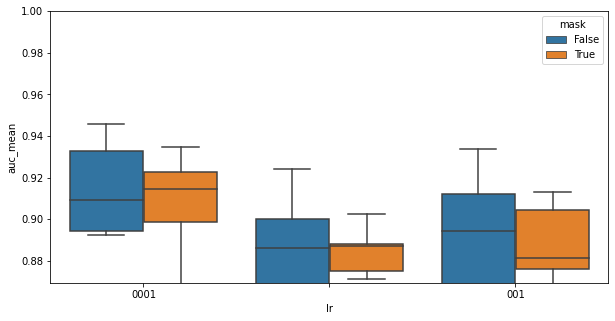

In [113]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8694992966902388, 1.0)]

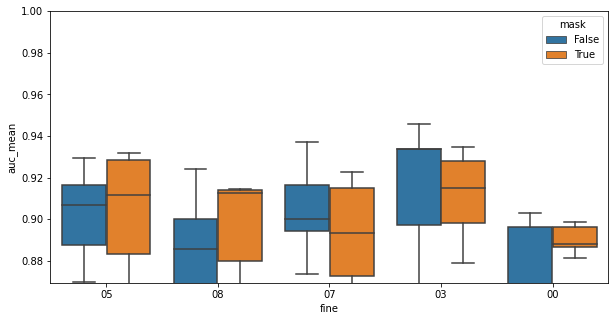

In [114]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.8694992966902388, 1.0)]

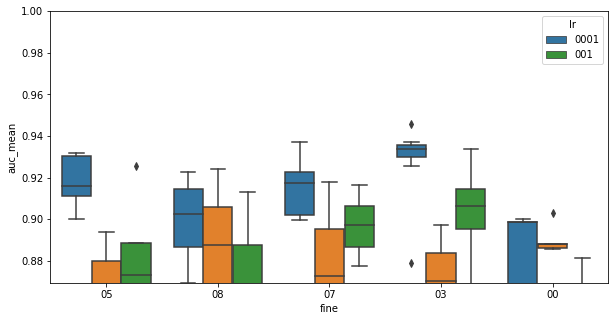

In [115]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

## SUBSET

In [116]:
df = df.reset_index(drop = True)

In [117]:
index = list(set(df.index) - set(index))
df = df.iloc[index]

In [118]:
df['mask'] = list(map(lambda x: bool(re.search('mask', x)), df['name']))

In [119]:
df['modelo'] = list(map(lambda x: re.split('_', x)[-5], df['name']))
df['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df['name']))
df['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df['name']))
df['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df['name']))

In [120]:
df['auc_mean'] = (df['auc_0']+df['auc_1']+df['auc_2'])/3
df['accuracy_mean'] = (df['accuracy_score_0']+
                             df['accuracy_score_1']+
                             df['accuracy_score_2'])/3

In [121]:
df.sort_values('auc_mean').tail()

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",mask,modelo,lr,batch,fine,auc_mean,accuracy_mean
36,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,0.974515,0.066946,0.066946,0.11042541265487672,0.872377,0.057974,0.049864,0.5447177886962891,0.930372,...,0.859571,0.854855,0.854855,True,IncResNet,0001,8,05,0.925755,0.857858
57,prueba_Xception_fine-08_batch-8_lr-001_auc-92,0.982717,0.196502,0.331068,0.13822942972183228,0.873779,0.382627,0.135059,0.590139627456665,0.923374,...,0.842476,0.843844,0.843844,False,Xception,001,8,08,0.926623,0.860527
22,prueba_mask_Xception_fine-03_batch-8_lr-0001_a...,0.977626,0.079139,0.098225,0.10953118652105333,0.877251,0.567552,0.562125,0.6664933562278748,0.942451,...,0.876968,0.877878,0.877878,True,Xception,0001,8,03,0.932443,0.853854
34,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.975083,0.455335,0.673091,0.6264345645904541,0.878748,0.110022,0.026167,0.20630334317684174,0.943782,...,0.859248,0.801802,0.801802,True,IncResNet,0001,8,03,0.932538,0.827828
6,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.991293,0.122462,0.366291,0.3662910461425781,0.893384,0.219937,0.219937,0.3667306900024414,0.931752,...,0.865743,0.852853,0.852853,False,EffNet3,0001,8,03,0.938810,0.870537


In [122]:
df.name.iloc[22]

'prueba_mask_Xception_fine-03_batch-8_lr-0001_auc-91'

In [123]:
df.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'mask', 'modelo', 'lr', 'batch', 'fine',
       'auc_mean', 'accuracy_mean'],
      dtype='object')

### Ploteo

In [124]:
y = 'accuracy_mean'
data = df
lim = np.percentile(data[y], 10)

[(0.712912912912913, 1.0)]

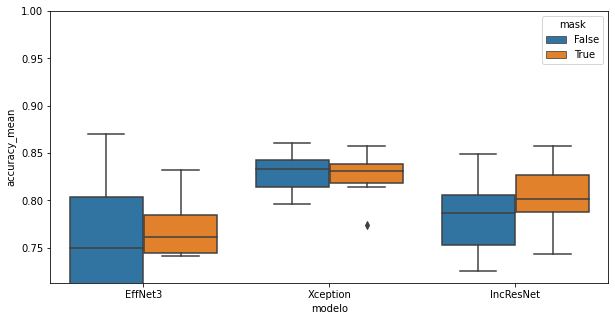

In [125]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.712912912912913, 1.0)]

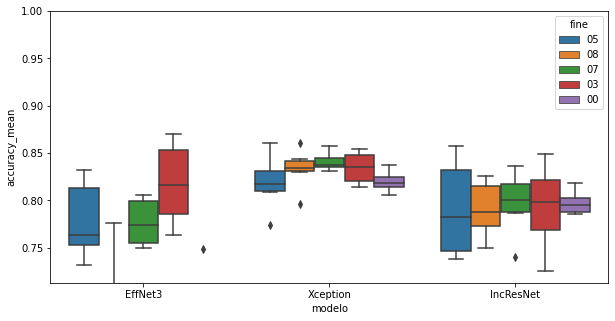

In [126]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="fine",
                data=data)
p.set(ylim=(lim, 1))

[(0.712912912912913, 1.0)]

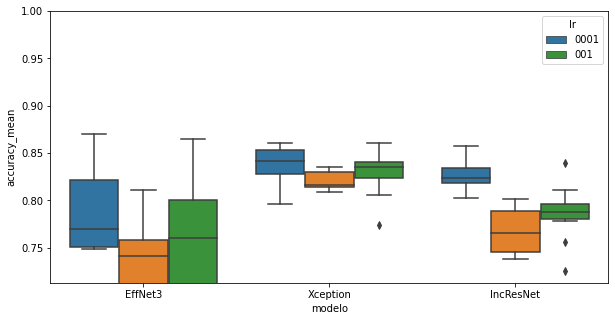

In [127]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="modelo", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.712912912912913, 1.0)]

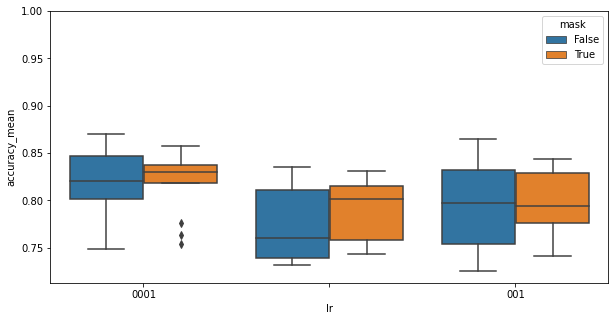

In [128]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.712912912912913, 1.0)]

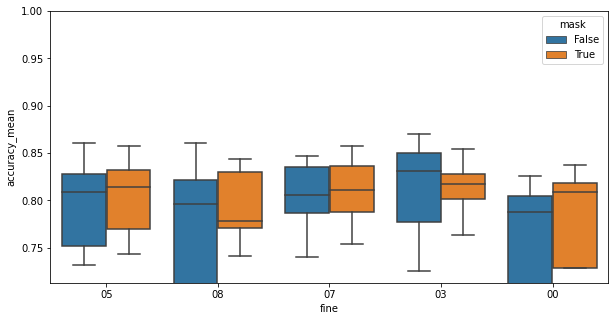

In [129]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

[(0.712912912912913, 1.0)]

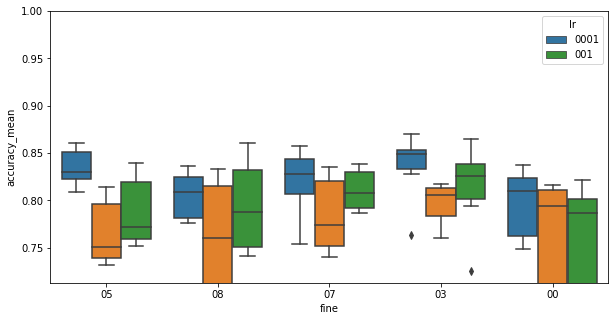

In [130]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="fine", y=y,
                hue="lr",
                data=data)
p.set(ylim=(lim, 1))

[(0.712912912912913, 1.0)]

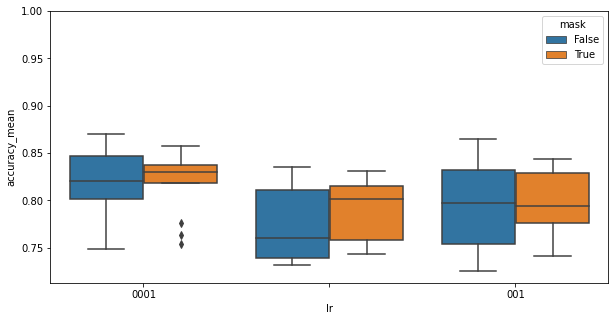

In [131]:
plt.subplots(figsize=(10,5))
p = sns.boxplot(x="lr", y=y,
                hue="mask",
                data=data)
p.set(ylim=(lim, 1))

## Cada modelo

In [477]:
import os
import cv2
import json

In [583]:
model_name = 'prueba_EffNet3_fine-00_batch-8_lr-0001_auc-54_resto'

In [584]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [585]:
os.listdir(p)

['metricas.json',
 'pred_rec_plot_0.png',
 'auc_plot_0.png',
 'pr_re_th_plot_0.png',
 'pred_rec_plot_1.png',
 'auc_plot_1.png',
 'pr_re_th_plot_1.png',
 'pred_rec_plot_2.png',
 'auc_plot_2.png',
 'pr_re_th_plot_2.png',
 'class_report.csv']

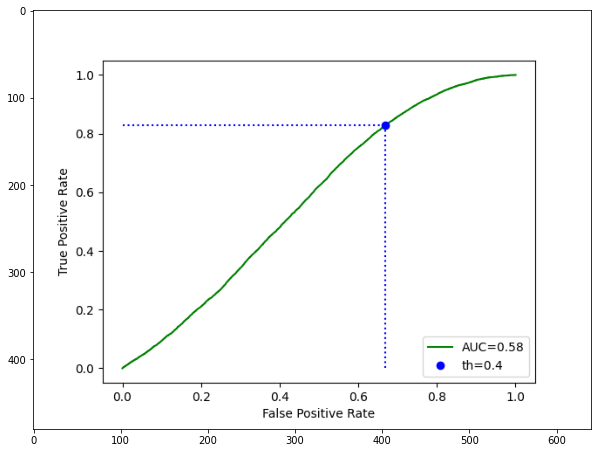

In [586]:
img = cv2.imread(os.path.join(p, 'auc_plot_2.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [587]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

{'auc_0': 0.5349968046304507,
 'younden_0': 0.27376100420951843,
 'pr_max_0': 0.27096015214920044,
 'pr_cut_0': 0,
 'auc_1': 0.45992249048866407,
 'younden_1': 0.322873592376709,
 'pr_max_1': 0.3225044012069702,
 'pr_cut_1': 0.32408204674720764,
 'auc_2': 0.5782317200939935,
 'younden_2': 0.40335923433303833,
 'pr_max_2': 0.4026626944541931,
 'pr_cut_2': 0,
 'f1_score_0': 0.3650024252660583,
 'precision_score_0': 0.27887811715001115,
 'recall_score_0': 0.5280891185680795,
 'accuracy_score_0': 0.5280891185680795,
 'f1_score_1': 0.511161157038865,
 'precision_score_1': 0.42151399164432835,
 'recall_score_1': 0.6492410889987851,
 'accuracy_score_1': 0.6492410889987851,
 'f1_score_2': 0.05341917214660672,
 'precision_score_2': 0.03144600251570728,
 'recall_score_2': 0.1773302075668646,
 'accuracy_score_2': 0.1773302075668646,
 'f1_score[0, 1]': 0.18216694725421295,
 'precision_score[0, 1]': 0.1230318136467582,
 'recall_score[0, 1]': 0.3507589110012149,
 'accuracy_score[0, 1]': 0.3507589110

In [483]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.883382,0.909910,0.896450,333.0
1,moderado,0.585714,0.123123,0.203474,333.0
2,severo,0.540956,0.951952,0.689880,333.0
3,micro avg,0.661662,0.661662,0.661662,999.0
4,macro avg,0.670017,0.661662,0.596601,999.0
5,weighted avg,0.670017,0.661662,0.596601,999.0
6,samples avg,0.661662,0.661662,0.661662,999.0
